<a href="https://colab.research.google.com/github/SreedeepRVS/titanic_survivor_prediction/blob/master/titanic_prediction_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
dataset=pd.read_csv('titanic.csv')

In [4]:
dataset.shape
dataset.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [26]:
dataset['Name']

0                                 Mr. Owen Harris Braund
1      Mrs. John Bradley (Florence Briggs Thayer) Cum...
2                                  Miss. Laina Heikkinen
3            Mrs. Jacques Heath (Lily May Peel) Futrelle
4                                Mr. William Henry Allen
                             ...                        
882                                 Rev. Juozas Montvila
883                          Miss. Margaret Edith Graham
884                       Miss. Catherine Helen Johnston
885                                 Mr. Karl Howell Behr
886                                   Mr. Patrick Dooley
Name: Name, Length: 887, dtype: object

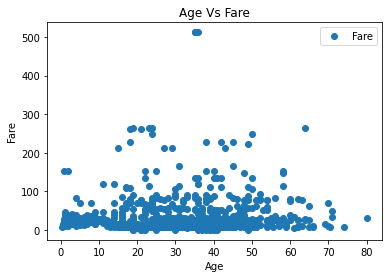

In [21]:
dataset.plot(x='Age',y='Fare',style='o')
plt.title('Age Vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [0]:
X = dataset[['Pclass','Age','Siblings/Spouses Aboard','Parents/Children Aboard','Fare']].values
Y = dataset['Survived'].values

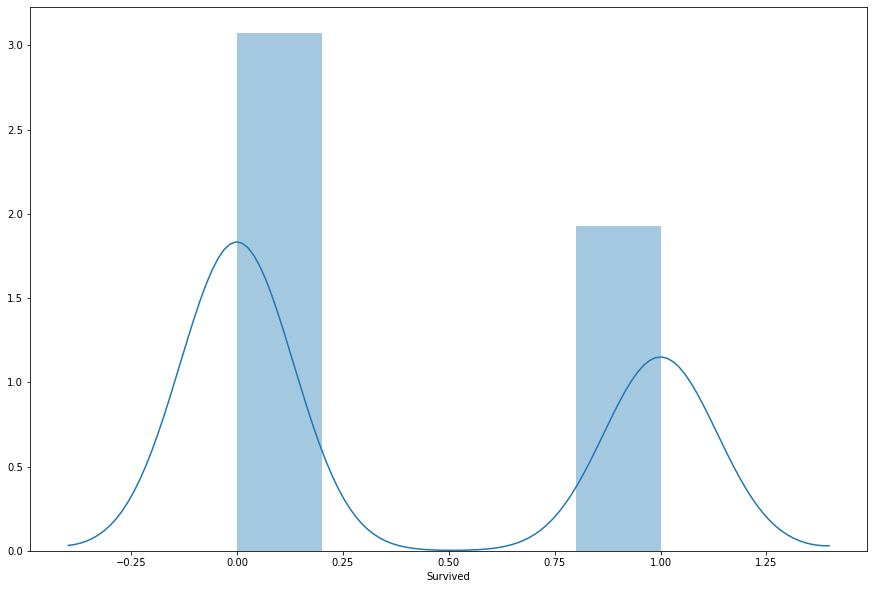

In [23]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['Survived'])

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [28]:
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
clean_dataset=dataset.drop(['Survived','Name','Sex'],axis=1)
clean_dataset

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
882,2,27.0,0,0,13.0000
883,1,19.0,0,0,30.0000
884,3,7.0,1,2,23.4500
885,1,26.0,0,0,30.0000


In [49]:
dataset

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [51]:
#column_=clean_dataset.iloc[2:].columns
coeff_df = pd.DataFrame(regressor.coef_,clean_dataset.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Pclass,-0.222480
Age,-0.008838
Siblings/Spouses Aboard,-0.038734
Parents/Children Aboard,0.043864
Fare,0.000686


In [0]:
y_pred=regressor.predict(X_test)

In [63]:
df=pd.DataFrame({'Actual':Y_test,'Predicted':y_pred})
df1=df.head(30)
df1

,Actual,Predicted
0,0,0.357924
1,0,0.257662
2,0,0.541860
3,1,0.207729
4,0,0.350700
5,0,0.567709
6,1,0.547368
7,1,0.456505
8,0,0.541742
9,0,0.477965


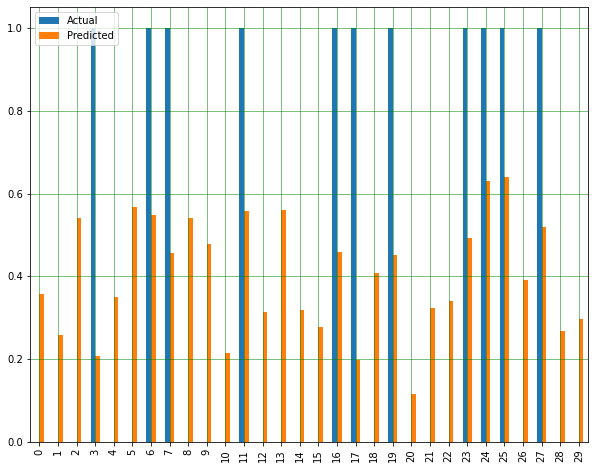

In [64]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [62]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.3952303867780813
Mean Squared Error: 0.19577086492923665
Root Mean Squared Error: 0.4424600150626457
